In [50]:
import pandas as pd
import numpy as np
from scipy.integrate import cumtrapz
from scipy.signal import detrend
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [51]:
"""MUESTREOS Pt1"""
pt1_1 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor1.csv"
pt1_2 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor2.csv"
pt1_3 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor3.csv"
pt1_4 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor4.csv"
pt1_5 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor5.csv"
pt1_6 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor6.csv"
pt1_7 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor7.csv"
pt1_8 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor8.csv"
pt1_9 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor9.csv"
pt1_10 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor10.csv"
pt1_11 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor11.csv"
pt1_12 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor12.csv"
pt1_13 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor13.csv"
pt1_14 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor14.csv"
pt1_15 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor15.csv"
pt1_16 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor16.csv"
pt1_17 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt1\DataRecor17.csv"

"""MUESTREOS Pt2"""

pt2_1 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor1.csv"
pt2_2 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor2.csv"
pt2_3 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor3.csv"
pt2_4 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor4.csv"
pt2_5 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor5.csv"
pt2_6 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor6.csv"
pt2_7 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor7.csv"
pt2_8 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor8.csv"
pt2_9 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor9.csv"
pt2_10 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor10.csv"
pt2_11 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor11.csv"
pt2_12 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor12.csv"
pt2_13 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor13.csv"
pt2_14 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor14.csv"
pt2_15 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor15.csv"
pt2_16 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor16.csv"
pt2_17 = r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\Datos_L3\pt2\DataRecor17.csv"

In [52]:
def integrar(path, time1, muestreo):
    #output_filename=rf"C:\Users\chelo\Documents\Vibras laboratorio 3\Pos vs tiempo {muestreo} Hz (de muestreo).csv"
    output_filename=rf"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\LAB 03 FORZADO\Pos vs tiempo {muestreo} Hz (de muestreo) forzado con amortiguamiento.csv"

    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep=",", names=["tiempo", "aceleracion"],skiprows=1)

    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]


    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + "," + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]

In [53]:
def integrar_forzado(path,forzamiento, time1):
    output_filename=rf"c:\Users\chelo\Documents\Vibras laboratorio 3\Forzado\Pos vs tiempo (forzado) {forzamiento} Hz (de muestreo).csv"
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"],skiprows=1)
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + "," + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]
# Llama a la función con el archivo adecuado, tiempo de corte y nombre de salida
def ajuste_func1(t, A, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A *np.sin(omega * t + phi)
def ajuste_func2(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

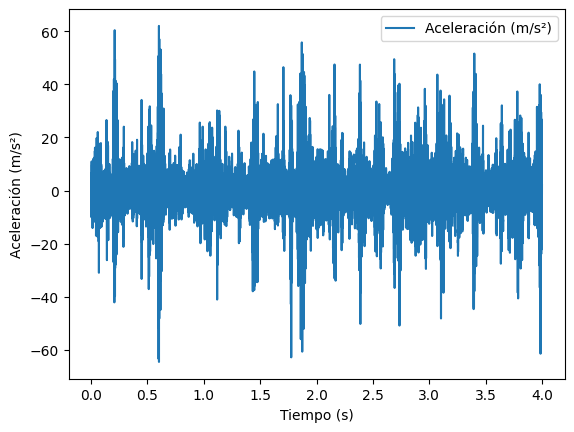

C:\Users\crist\AppData\Local\Temp\ipykernel_22100\1998661340.py:25: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)
C:\Users\crist\AppData\Local\Temp\ipykernel_22100\1998661340.py:28: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  posicion = cumtrapz(velocidad, data["tiempo"], initial=0)


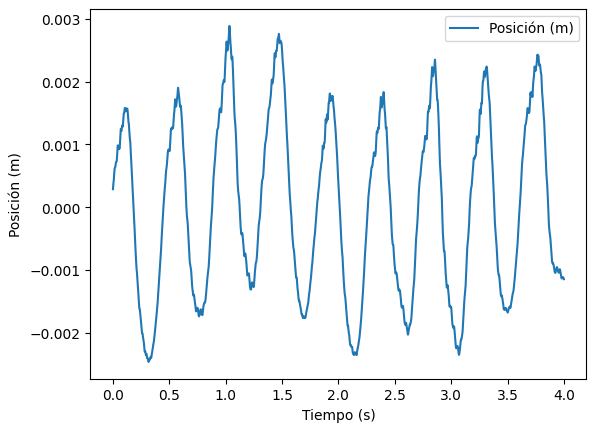

0        0.000287
1        0.000298
2        0.000308
3        0.000318
4        0.000328
           ...   
10235   -0.001140
10236   -0.001141
10237   -0.001143
10238   -0.001144
10239   -0.001147
Name: posicion, Length: 10240, dtype: float64

In [54]:
integrar(pt2_1,5,10)

In [55]:
import pandas as pd
def inspeccionar_archivo(path):
    # Leer las primeras filas del archivo
    try:
        data = pd.read_csv(path)
        print(data.head())  # Mostrar las primeras filas del archivo
    except Exception as e:
        print("Error al leer el archivo:", e)

In [67]:
#Función que utiliza ajustes para la señal de posición vs tiempo. De esta manera se obtiene el parámetro B, delta, xi y por lo tanto w_n=B/xi
def frecuencia_natural(path, time1=10):
    # Cargar los datos y asegurar que se lean como texto
    tabla = pd.read_csv(path, sep=",", header=None, names=["tiempo_posicion"], dtype={"tiempo_posicion": str})
    # Separar los valores en las columnas 'tiempo' y 'posición'
    tabla[['tiempo', 'posición']] = tabla['tiempo_posicion'].str.split(',', expand=True).astype(float)
    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]
    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values
    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)
    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    # params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])
    params, _ = curve_fit(ajuste_func, tiempo, posicion)

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")
    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)
    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))
    #Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()

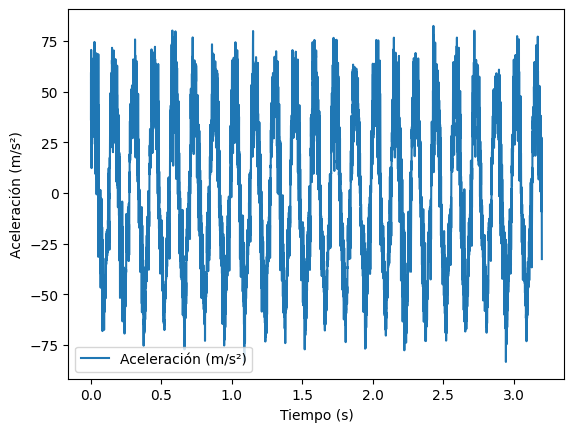

C:\Users\crist\AppData\Local\Temp\ipykernel_22100\1998661340.py:25: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)
C:\Users\crist\AppData\Local\Temp\ipykernel_22100\1998661340.py:28: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  posicion = cumtrapz(velocidad, data["tiempo"], initial=0)


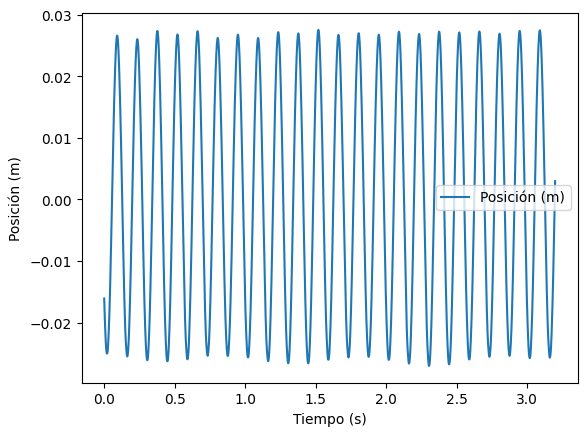

0      -0.016091
1      -0.016416
2      -0.016735
3      -0.017047
4      -0.017352
          ...   
8187    0.001097
8188    0.001569
8189    0.002043
8190    0.002516
8191    0.002986
Name: posicion, Length: 8192, dtype: float64

In [96]:
integrar(pt2_17,5,10)

A = -0.026175280958314364, B = -0.005801336966680831, frecuencia = 7.001877473540074, phi = 0.6893907635875293
Delta entre pico 1 y pico 2: 0.0025
Delta entre pico 2 y pico 3: -0.0041
Delta entre pico 3 y pico 4: -0.0009
Delta entre pico 4 y pico 5: 0.0025
Delta entre pico 5 y pico 6: -0.0040
Delta entre pico 6 y pico 7: -0.0010
Delta entre pico 7 y pico 8: 0.0024
Delta entre pico 8 y pico 9: -0.0038
Delta entre pico 9 y pico 10: -0.0011
Delta entre pico 10 y pico 11: 0.0023
Delta entre pico 11 y pico 12: -0.0037
Delta entre pico 12 y pico 13: -0.0012
Delta entre pico 13 y pico 14: 0.0022
Delta entre pico 14 y pico 15: -0.0035
Delta entre pico 15 y pico 16: -0.0012
Delta entre pico 16 y pico 17: 0.0022
Delta entre pico 17 y pico 18: -0.0034
Delta entre pico 18 y pico 19: -0.0013
Delta entre pico 19 y pico 20: 0.0021
Delta entre pico 20 y pico 21: -0.0032
Delta entre pico 21 y pico 22: -0.0014
Delta entre pico 22 y pico 23: 0.0020
Delta entre pico 23 y pico 24: -0.0031
Delta entre pico 

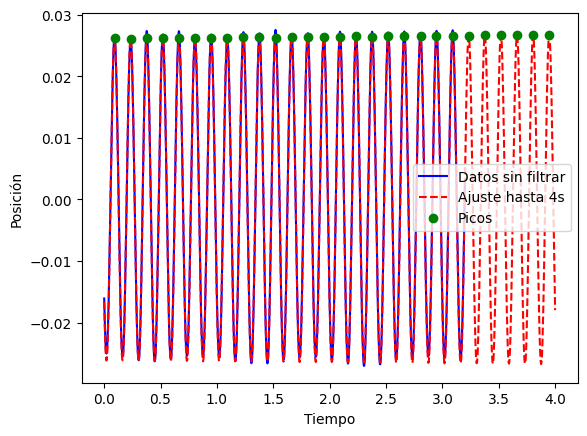

In [97]:
#frecuencia_natural(r"C:\Users\chelo\Documents\Vibras Laboratorio 3\Pos vs tiempo 10 Hz (de muestreo).csv",4)
frecuencia_natural(r"C:\Uchile\8vo semestre\Vibraciones Mecanicas\repositorio vibras\LAB 03 FORZADO\Pos vs tiempo 10 Hz (de muestreo) forzado con amortiguamiento.csv",4)

# encontrar los picos

In [59]:
#Función que utiliza ajustes para la señal de posición vs tiempo. De esta manera se obtiene el parámetro B, delta, xi y por lo tanto w_n=B/xi

def frecuencia_natural_2(path, time1=10):
    # Cargar los datos y asegurar que se lean como texto
    tabla = pd.read_csv(path, sep=",", header=None, names=["tiempo_posicion"], dtype={"tiempo_posicion": str})
    
    # Separar los valores en las columnas 'tiempo' y 'posición'
    tabla[['tiempo', 'posición']] = tabla['tiempo_posicion'].str.split(',', expand=True).astype(float)

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo_ajustado = tabla_filtrada["tiempo"].values
    posicion_ajustada = tabla_filtrada["posición"].values

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)
    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]
    # Obtener valores absolutos de los picos
    valores_absolutos_picos = np.abs(valores_picos)

    # Calcular el promedio de los valores absolutos
    promedio_valores_absolutos = np.mean(valores_absolutos_picos)

    print("Valores absolutos de los picos:", valores_absolutos_picos)
    print("Promedio de valores absolutos:", promedio_valores_absolutos)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    #frecuencia_natural = B / xhi
    # print("xhi:", xhi)
    #print("frecuencia natural (rad/s):", frecuencia_natural)
    #print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()



In [60]:
frecuencia_natural(r"C:\Users\chelo\Documents\Vibras Laboratorio 3\Pos vs tiempo 10 Hz (de muestreo).csv",4)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\chelo\\Documents\\Vibras Laboratorio 3\\Pos vs tiempo 10 Hz (de muestreo).csv'